<a href="https://colab.research.google.com/github/bwoahzack/BigDataDings/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
System rekomendacji filmów z bazy danych movielens dla użytkownika serwisu przy użyciu metody algorytmu k najbliższych sąsiadów

SyntaxError: ignored

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

     

#uzyty zbior danych

ZBIOR_DANYCH ='http://files.grouplens.org/datasets/movielens/ml-100k.zip'

#wypakowanie zbioru danych  

!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

--2023-06-04 22:07:12--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  5.40MB/s    in 0.9s    

2023-06-04 22:07:13 (5.40 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

Na początek załadowanie pliku u.data -> w nim znajdują się informacje dotyczące id użytkownika, id filmu, oceny wystawionej przez tego użytkownika oraz czas kiedy została wystawiona dana ocena 


In [3]:
data_columns = ['id_uzytkownika', 'id_filmu', 'ocena', 'czas_wystawienia_oceny']
data_dataset = pd.read_csv('ml-100k/u.data', sep='\t', names=data_columns)
data_dataset


,id_uzytkownika,id_filmu,ocena,czas_wystawienia_oceny
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


Załadowanie pliku u.item -> w tym pliku mamy informacje m.in. na temat tytułu filmu, date jego premiery oraz do jakiego gatunku zalicza się dany film

In [4]:
data_columns_2 = 'id_filmu | tytul | data premiery | puste | link do IMDb | nie znany | akcji | przygodowy | animowany | dla dzieci | komediowy | kryminalny | dokumentarny | dramatyczny | fantazyjny | noir | horror | komedia muzyczna | zagadkowy | romantyczny | sci-fi | dreszczowiec | wojenny | dziki zachod'
column_names = data_columns_2.split(' | ')
column_names


['id_filmu',
 'tytul',
 'data premiery',
 'puste',
 'link do IMDb',
 'nie znany',
 'akcji',
 'przygodowy',
 'animowany',
 'dla dzieci',
 'komediowy',
 'kryminalny',
 'dokumentarny',
 'dramatyczny',
 'fantazyjny',
 'noir',
 'horror',
 'komedia muzyczna',
 'zagadkowy',
 'romantyczny',
 'sci-fi',
 'dreszczowiec',
 'wojenny',
 'dziki zachod']

In [5]:
items_dataset = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names,encoding='latin-1')
items_dataset

,id_filmu,tytul,data premiery,puste,link do IMDb,nie znany,akcji,przygodowy,animowany,dla dzieci,...,fantazyjny,noir,horror,komedia muzyczna,zagadkowy,romantyczny,sci-fi,dreszczowiec,wojenny,dziki zachod
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
movie_dataset = items_dataset[['id_filmu','tytul']]
movie_dataset

,id_filmu,tytul
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [7]:
merged_dataset = pd.merge(data_dataset, movie_dataset, how='inner', on='id_filmu')
merged_grouped_dataset = merged_dataset.groupby(by=['id_uzytkownika','tytul'], as_index=False).agg({"ocena":"mean"})
merged_dataset

,id_uzytkownika,id_filmu,ocena,czas_wystawienia_oceny,tytul
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [8]:
merged_grouped_dataset

,id_uzytkownika,tytul,ocena
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0
...,...,...,...
99688,943,"Wizard of Oz, The (1939)",3.0
99689,943,Wolf (1994),2.0
99690,943,Wyatt Earp (1994),1.0
99691,943,Young Guns (1988),4.0


Ilosc uzytkownikow oraz filmow w zbiorze danych

In [9]:
ilosc_uzytkownikow = len(merged_grouped_dataset['id_uzytkownika'].value_counts())
ilosc_filmow = len(merged_grouped_dataset['tytul'].value_counts())
print(f'Ilosc uzytkownikow w zbiorze danych: {ilosc_uzytkownikow}')
print(f'Ilosc filmow w zbiorze danych: {ilosc_filmow}')
rating_count = pd.DataFrame(merged_grouped_dataset.groupby(['ocena']).size(), columns=['licznik'])
rating_count

Ilosc uzytkownikow w zbiorze danych: 943
Ilosc filmow w zbiorze danych: 1664


,licznik
ocena,
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


Postac graficzna powyzszej tabeli

Text(0, 0.5, 'ilosc ocen')

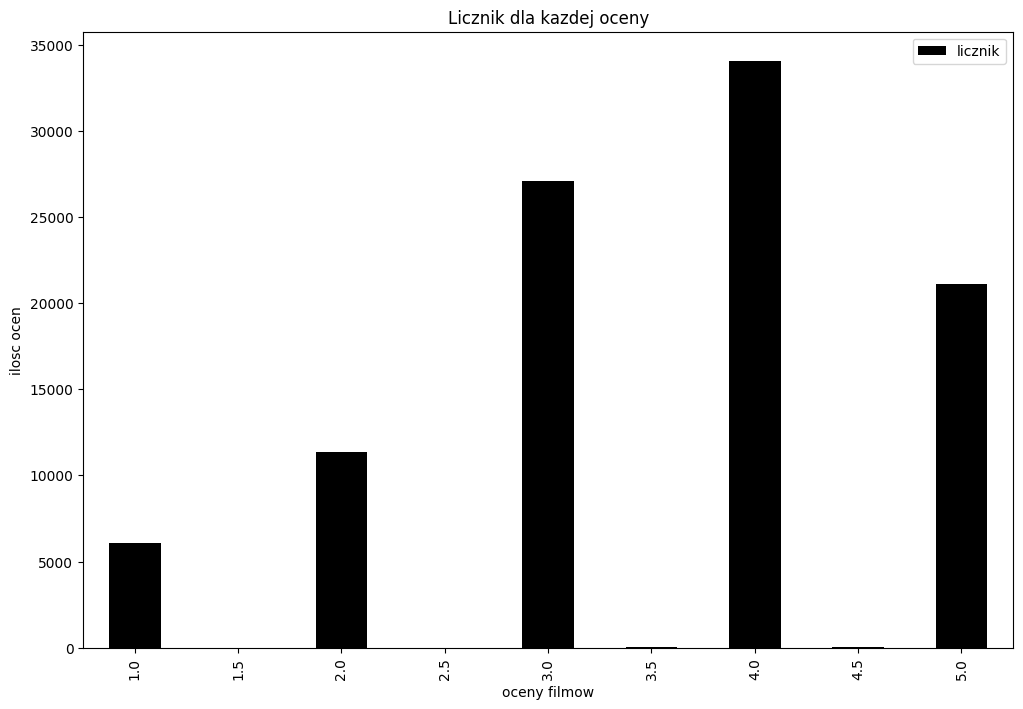

In [10]:
licznik_ocen = rating_count.reset_index().rename(columns={'index': 'ocena'}).plot('ocena','licznik', 'bar', figsize=(12, 8) , title='Licznik dla kazdej oceny', color='black')
licznik_ocen.set_xlabel("oceny filmow")
licznik_ocen.set_ylabel("ilosc ocen")

Jak widac na obrazku, oceny 1.5, 2.5, 3.5 oraz 4.5 sa praktycznie niewidoczne na tle pozostalych 

Uwzglednienie uzytkownikow ktorzy nie wystawili oceny dla danego filmu (ocena w tym przypadku wyniesie 0)

In [11]:
calkowita_ilosc = ilosc_uzytkownikow * ilosc_filmow
zero = calkowita_ilosc-merged_grouped_dataset.shape[0]
rating_count = rating_count.append(pd.DataFrame({'licznik': zero}, index=[0.0])).sort_index()
rating_count

<ipython-input-11-f5fc138e74e0>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_count = rating_count.append(pd.DataFrame({'licznik': zero}, index=[0.0])).sort_index()


,licznik
0.0,1469459
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


ilosc wystawionych ocen dla poszczegolnych filmow

In [12]:
movie_dataset_count = pd.DataFrame(merged_grouped_dataset.groupby('tytul').size(), columns=['licznik'])
movie_dataset_count

,licznik
tytul,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41
...,...
Young Guns II (1990),44
"Young Poisoner's Handbook, The (1995)",41
Zeus and Roxanne (1997),6


Rekomendacja filmów przy użyciu KNN z podanym identyfikatorem użytkownika, liczbą podobnych użytkowników do wybrania przez model i liczbą filmów, które chcemy otrzymać jako rekomendację

Model zostaje przeksztalcony w taki sposób, że każdy użytkownik ma przestrzeń ocen wielowymiarową o rozmiarze n równym całkowitej liczbie filmów.

Model bedzie trenowany, aby znaleźć najbardziej podobnych użytkowników do podanego użytkownika i zalecić najlepsze filmy, które mogą go zainteresować.

In [13]:
#przygotowanie danych (reshape)
user_to_movie = merged_grouped_dataset.pivot(index='id_uzytkownika', columns='tytul', values='ocena').fillna(0)
user_to_movie.head()

tytul,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
id_uzytkownika,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


t.b.c.

In [16]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
# transformujemy macierz do scipy sparse matrix
user_to_movie_sparse = csr_matrix(user_to_movie.values)
user_to_movie_sparse

<943x1664 sparse matrix of type '<class 'numpy.float64'>'
	with 99693 stored elements in Compressed Sparse Row format>

In [17]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_to_movie_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

funkcja do znalezienia n podobnych uzytkownikow do uzytkownika do ktorego chcemy to porownac

In [47]:
def get_similar_users(user, n = 15):
  knn_input = np.asarray([user_to_movie.values[user-1]])  #.reshape(1,-1)
  distances, indices = knn.kneighbors(knn_input, n_neighbors=n+1)
  
  print("Top",n,"users who are very much similar to the User-",user, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
  return indices.flatten()[1:] + 1, distances.flatten()[1:]

In [58]:
from pprint import pprint
user_id = 778
print("Movies seen by the User:")
pprint(list(merged_grouped_dataset[merged_grouped_dataset['id_uzytkownika'] == user_id]['tytul']))
similar_user_list, distance_list = get_similar_users(user_id, 15)

Movies seen by the User:
['Amityville Horror, The (1979)',
 'Angels in the Outfield (1994)',
 'Apocalypse Now (1979)',
 'Apollo 13 (1995)',
 'Austin Powers: International Man of Mystery (1997)',
 'Babe (1995)',
 'Back to the Future (1985)',
 'Blues Brothers, The (1980)',
 'Chasing Amy (1997)',
 'Clerks (1994)',
 'Clueless (1995)',
 'Color of Night (1994)',
 'Cool Runnings (1993)',
 'Dead Poets Society (1989)',
 'Die Hard (1988)',
 'Die Hard 2 (1990)',
 'Die Hard: With a Vengeance (1995)',
 'Dumb & Dumber (1994)',
 'E.T. the Extra-Terrestrial (1982)',
 'Forrest Gump (1994)',
 'Free Willy (1993)',
 'Free Willy 2: The Adventure Home (1995)',
 'Fugitive, The (1993)',
 'Graduate, The (1967)',
 'Grease (1978)',
 'Home Alone (1990)',
 'Hunt for Red October, The (1990)',
 'In the Company of Men (1997)',
 'Independence Day (ID4) (1996)',
 "It's a Wonderful Life (1946)",
 'Jaws (1975)',
 'Jumanji (1995)',
 'Jurassic Park (1993)',
 'Mission: Impossible (1996)',
 'Monty Python and the Holy Grail (

In [62]:
weightage_list = distance_list/np.sum(distance_list)
weightage_list

array([0.05088736, 0.06192999, 0.06499715, 0.06563908, 0.06647348,
       0.06681682, 0.06774546, 0.0678838 , 0.06849061, 0.06946619,
       0.06948447, 0.06958535, 0.06965998, 0.07026743, 0.07067282])

In [63]:
ratings_from_simillar_users = user_to_movie.values[similar_user_list]
ratings_from_simillar_users
     

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
movies_list = user_to_movie.columns
movies_list
     
print("Weightage list shape:", len(weightage_list))
print("mov_rtngs_sim_users shape:", ratings_from_simillar_users.shape)
print("Number of movies:", len(movies_list))

Weightage list shape: 10
mov_rtngs_sim_users shape: (10, 1664)
Number of movies: 1664


In [52]:
weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
new_rating_matrix = weightage_list*ratings_from_simillar_users
mean_rating_list = new_rating_matrix.sum(axis =0)
mean_rating_list    

array([0.       , 0.       , 0.4902918, ..., 0.       , 0.       ,
       0.       ])

In [53]:
from pprint import pprint
def recommend_movies(n):
  n = min(len(mean_rating_list),n)
  # print(np.argsort(mean_rating_list)[::-1][:n])
  pprint(list(movies_list[np.argsort(mean_rating_list)[::-1][:n]]))
print("Movies recommended based on similar users are: ")
recommend_movies(10)

Movies recommended based on similar users are: 
['Star Wars (1977)',
 'Liar Liar (1997)',
 'Fargo (1996)',
 "Schindler's List (1993)",
 'Contact (1997)',
 'Jerry Maguire (1996)',
 'Terminator, The (1984)',
 'Saint, The (1997)',
 'Fugitive, The (1993)',
 'Return of the Jedi (1983)']


In [54]:
def filtered_movie_recommendations(n):
  
  first_zero_index = np.where(mean_rating_list == 0)[0][-1]
  sortd_index = np.argsort(mean_rating_list)[::-1]
  sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
  n = min(len(sortd_index),n)
  movies_watched = list(merged_grouped_dataset[merged_grouped_dataset['id_uzytkownika'] == user_id]['tytul'])
  filtered_movie_list = list(movies_list[sortd_index])
  count = 0
  final_movie_list = []
  for i in filtered_movie_list:
    if i not in movies_watched:
      count+=1
      final_movie_list.append(i)
    if count == n:
      break
  if count == 0:
    print("There are no movies left which are not seen by the input users and seen by similar users. May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
  else:
    pprint(final_movie_list)
filtered_movie_recommendations(10)

['Star Wars (1977)',
 'Liar Liar (1997)',
 'Fargo (1996)',
 "Schindler's List (1993)",
 'Contact (1997)',
 'Jerry Maguire (1996)',
 'Saint, The (1997)',
 'Return of the Jedi (1983)',
 'L.A. Confidential (1997)',
 'English Patient, The (1996)']


In [55]:
from pprint import pprint

def recommender_system(user_id, n_similar_users, n_movies): #, user_to_movie_df, knn_model):
  
  print("Movie seen by the User:")
  pprint(list(merged_grouped_dataset[merged_grouped_dataset['id_uzytkownika'] == user_id]['tytul']))
  print("")

  # def get_similar_users(user, user_to_movie_df, knn_model, n = 5):
  def get_similar_users(user, n):
    
    knn_input = np.asarray([user_to_movie.values[user-1]])
    
    distances, indices = knn.kneighbors(knn_input, n_neighbors=n+1)
    
    print("Top",n,"users who are very much similar to the User-",user, "are: ")
    print(" ")

    for i in range(1,len(distances[0])):
      print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
    print("")
    return indices.flatten()[1:] + 1, distances.flatten()[1:]


  def filtered_movie_recommendations(n):
  
    first_zero_index = np.where(mean_rating_list == 0)[0][-1]
    sortd_index = np.argsort(mean_rating_list)[::-1]
    sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
    n = min(len(sortd_index),n)
    movies_watched = list(merged_grouped_dataset[merged_grouped_dataset['id_uzytkownika'] == user_id]['tytul'])
    filtered_movie_list = list(movies_list[sortd_index])
    count = 0
    final_movie_list = []
    for i in filtered_movie_list:
      if i not in movies_watched:
        count+=1
        final_movie_list.append(i)
      if count == n:
        break
    if count == 0:
      print("There are no movies left which are not seen by the input users and seen by similar users. May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
    else:
      pprint(final_movie_list)

  similar_user_list, distance_list = get_similar_users(user_id,n_similar_users)
  weightage_list = distance_list/np.sum(distance_list)
  mov_rtngs_sim_users = user_to_movie.values[similar_user_list]
  movies_list = user_to_movie.columns
  weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
  new_rating_matrix = weightage_list*ratings_from_simillar_users
  mean_rating_list = new_rating_matrix.sum(axis=0)
  print("")
  print("Movies recommended based on similar users are: ")
  print("")
  filtered_movie_recommendations(n_movies)

In [65]:
'''print("Enter user id")
user_id= int(input())
print("number of similar users to be considered")
sim_users = int(input())
print("Enter number of movies to be recommended:")
n_movies = int(input())'''
recommender_system(307,15,15)
     

Movie seen by the User:
['12 Angry Men (1957)',
 '2001: A Space Odyssey (1968)',
 'Abyss, The (1989)',
 'Alien (1979)',
 'Apollo 13 (1995)',
 'Back to the Future (1985)',
 'Barbarella (1968)',
 'Batman (1989)',
 'Beauty and the Beast (1991)',
 'Blade Runner (1982)',
 'Blues Brothers, The (1980)',
 'Boot, Das (1981)',
 'Brady Bunch Movie, The (1995)',
 'Braveheart (1995)',
 'Brazil (1985)',
 'Casablanca (1942)',
 'Close Shave, A (1995)',
 'Contact (1997)',
 'Crying Game, The (1992)',
 'Dead Poets Society (1989)',
 'Dial M for Murder (1954)',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
 'Dragonheart (1996)',
 'E.T. the Extra-Terrestrial (1982)',
 'Empire Strikes Back, The (1980)',
 'English Patient, The (1996)',
 'Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995)',
 'Escape from L.A. (1996)',
 'Fargo (1996)',
 'Fast, Cheap & Out of Control (1997)',
 'Field of Dreams (1989)',
 'Fish Called Wanda, A (1988)',
 'Four Weddings and a Funera